## Capstone project
* Goals
  * Data extraction
      * Download a publicly available dataset. 
      * Describe the dataset 
      * Describe what question you intend to answer with the dataset
  * Data cleanup
      * Write a script/function to clean up the dataset. 
      * This might involve
        - cleaning up columns
        - removing/filling missing data
  * Data visualization
      * Visualize important dimensions of the data
      * Outline a few trends you can see 
  * Descriptive/Predictive analytics
      * Draw conclusions from the data
          * This can based on descriptive statistics and/or visualization
          * Predictive models (preferred) and carries 10 extra points.public
 

### Open datasets
          
* Resources for open data
  * https://data.boston.gov/
  * https://www.data.gov/
  * https://www.bls.gov/data/
  * http://www.fao.org/statistics/databases/en/
  * http://ec.europa.eu/eurostat/web/main
  * https://github.com/awesomedata/awesome-public-datasets
  * https://www.kdnuggets.com/2016/05/top-10-datasets-github.html
  * https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public

The capstone project will focus on studying daily statistic for trending YouTube videos. The dataset is publicly accessible and available for download from https://www.kaggle.com/datasnaek/youtube-new/data. This dataset includes serval months of data on daily trending YouTube videos. Data is included for the United State, Great Britain, Germany, Canada, and France, with up to 200 listed trending video per day. I focus solely on the United State dataset. The questions that I want to answered by the end of the project:

- which category has the most likes and dislikes?
- Sentiment analysis for each categories in a variety of forms
- What factors affect how popular a YouTube video will be
- Analysis the relationship between likes/dislikes and comments/views
- Analysis of the changes over time

The dataset includes data gathered from videos on YouTube that are contained within the trending category each day. Data includes the -> more information please see the summary below
- video title
- channel title
- publish time
- tags
- views
- likes
- dislikes
- description

In [143]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime as dt

#import US data
usvideos = pd.read_csv('/Users/ruilin/Desktop/ALY 6983/Capstone Assignment/youtube/USvideos.csv',error_bad_lines=False)
usvideos_categories = pd.read_json('/Users/ruilin/Desktop/ALY 6983/Capstone Assignment/youtube/US_category_id.json')
categories = {int(category['id']): category['snippet']['title'] for category in usvideos_categories['items']}

#removing the possible duplication 
usvideos = usvideos.drop_duplicates(subset='video_id', keep="last")

In [128]:
#Overview of metadata information
usvideos.category_id = us_videos.category_id.astype('category')
usvideos.info()
usvideos.describe(include = [np.object])

#Summary of Numeric variables 
usvideos.describe(percentiles=[.05,.25,.5,.75,.95]).round(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4881 entries, 10 to 24950
Data columns (total 16 columns):
video_id                  4881 non-null object
trending_date             4881 non-null object
title                     4881 non-null object
channel_title             4881 non-null object
category_id               4881 non-null category
publish_time              4881 non-null object
tags                      4881 non-null object
views                     4881 non-null int64
likes                     4881 non-null int64
dislikes                  4881 non-null int64
comment_count             4881 non-null int64
thumbnail_link            4881 non-null object
comments_disabled         4881 non-null bool
ratings_disabled          4881 non-null bool
video_error_or_removed    4881 non-null bool
description               4791 non-null object
dtypes: bool(3), category(1), int64(4), object(8)
memory usage: 515.5+ KB


,views,likes,dislikes,comment_count
count,4881.0,4881.0,4881.0,4881.0
mean,1332432.3,41028.9,2618.1,5089.9
std,4635730.9,145534.0,35412.3,30563.4
min,559.0,0.0,0.0,0.0
5%,9391.0,59.0,4.0,8.0
25%,99837.0,1676.0,84.0,254.0
50%,350202.0,8067.0,314.0,920.0
75%,1050880.0,26794.0,1087.0,3012.0
95%,4440269.0,165337.0,6316.0,16939.0
max,149376127.0,3093544.0,1674420.0,1361580.0


In [129]:
##Data Cleaup Processing

#transform trending data to datetime format 
usvideos['trending_date'] = pd.to_datetime(usvideos['trending_date'], format='%y.%d.%m').dt.date
usvideos.trending_date.value_counts().sort_index(inplace=True)

#transform publish time to datetime fomat
publish_time = pd.to_datetime(usvideos.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')
usvideos['publish_date'] = publish_time.dt.date
usvideos.drop('publish_time',axis = 1, inplace =True)

#data clean up, drop unreliable observations 
usvideos = usvideos[usvideos.video_error_or_removed]
print(usvideos[usvideos.video_error_or_removed])

          video_id trending_date  \
2203   RK_B4Ez4_5Q    2017-11-25   
15980  kZete48ZtsY    2018-02-03   

                                                   title  \
2203   Verizon 360 Live: The Macy’s Thanksgiving Day ...   
15980                                      Deleted video   

                channel_title category_id  \
2203                  Verizon          24   
15980  DaHoopSpot Productions          17   

                                                    tags    views  likes  \
2203   live stream|"360 video"|"fun videos for kids"|...  2618344  45197   
15980                                             [none]     2620      8   

       dislikes  comment_count  \
2203       2315           3332   
15980        12              5   

                                       thumbnail_link  comments_disabled  \
2203   https://i.ytimg.com/vi/RK_B4Ez4_5Q/default.jpg              False   
15980  https://i.ytimg.com/vi/NzCSJrxQyQI/default.jpg              False   

       rating

live stream were included in the dataset, these are likely get trending immediately and lose popularity within a couple of days

 1: Film & Animation          2: Autos & Vehicles         10: Music                    15: Pets & Animals           
17: Sports                   18: Short Movies             19: Travel & Events          20: Gaming                   
21: Videoblogging            22: People & Blogs           23: Comedy                   24: Entertainment            
25: News & Politics          26: Howto & Style            27: Education                28: Science & Technology     
29: Nonprofits & Activism    30: Movies                   31: Anime/Animation          32: Action/Adventure         
33: Classics                 34: Comedy                   35: Documentary              36: Drama                    
37: Family                   38: Foreign                  39: Horror                   40: Sci-Fi/Fantasy           
41: Thriller                 42: Shorts                   43: Shows                    44: Trailers                 

32 Categories in Total.
category_id
1      37806.094262
2      

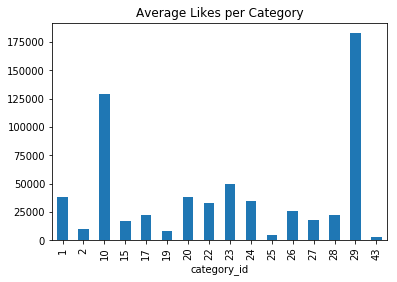

category_id
1      1704.860656
2       644.090909
10     4235.009950
15      391.966942
17     1698.448071
19      605.176471
20     2499.881356
22     1956.244032
23     1681.929268
24     4568.390468
25     1328.852941
26      952.762115
27      689.474227
28     1154.929487
29    43315.461538
43      180.000000
Name: dislikes, dtype: float64


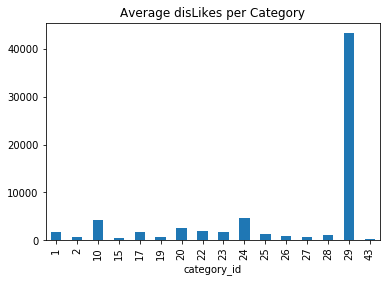

In [158]:
#summary of available cateogies -> label indactor 
counter = 0
for k,v in categories.items():
    print('{:2d}: {:24}'.format(k,v),end=' ')
    counter += 1
    if counter % 4 == 0:
        print()
print('\n{} Categories in Total.'.format(counter))

# Q1: Cateogries has the most average likes and dislike 
usvideos_average = usvideos.sort_values('likes', ascending=False).drop_duplicates('video_id').sort_index()
usvideos_average.groupby('category_id').likes.mean().plot(kind="bar")
print(usvideos_average.groupby('category_id').likes.mean())
plt.title("Average Likes per Category")
plt.show()

usvideos_average = usvideos.sort_values('dislikes', ascending=False).drop_duplicates('video_id').sort_index()
usvideos_average.groupby('category_id').dislikes.mean().plot(kind="bar")
print(usvideos_average.groupby('category_id').dislikes.mean())
plt.title("Average disLikes per Category")
plt.show()

With this information, one can see which categories has the highest and lowest average likes and dislike rate 
The top three categories_likes are:
- Nonprofits & Activism (category_id: 29, average likes: 182,900, average dislike: 43,315 )
- Music (category_id: 10, average likes: 128,797)
- Comedy (category_id: 23, average likes: 49,863)

The bottom three categories_likes are: 
- Travel & Events (category_id: 19, average likes: 8,389)
- News & Politics (category_id: 25, average likes: 4,574)
- Shows (category_id: 42, average likes: 2,946)

The top three categories_dislikes are:
- Nonprofits & Activism (category_id: 29, average dislike: 43,315 )
- Entertainment (category_id: 24, average dislike: 4,568)
- Music (category_id: 10, average likes: 4,235)

It's interesting to see that nonprofit & activism catrgory hit so many likes and dislike at same time. I found the reason behind that is the video called Suicide: Be Here Tomorrw by Logan Paul Vlogs, the video achieved nearly 2M likes and 589K dislike from Jan 24th till today. 
YouTuber Logan Paul uploaded a video on Dec.31, 2017, that showed the body of a man who appeared to have recently committed sucide, Logan faced heavy critcism from every corner of the internet. This video was his returned to YouTube after taking a break from the platform to deal with backlash. 

category_id
1     0.926718
2     0.901217
10    0.960439
15    0.967674
17    0.894638
19    0.928403
20    0.956149
22    0.929710
23    0.948916
24    0.912968
25    0.768008
26    0.957752
27    0.952468
28    0.939061
29    0.909889
43    0.929895
Name: enthusiasm, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


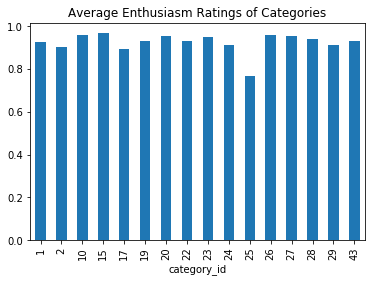

In [173]:
# how enthusatsically are centrain categories of videos received 
usvideos['enthusiasm'] = usvideos['likes'] / (usvideos['likes'] + usvideos['dislikes'])
print(usvideos.groupby(['category_id'])['enthusiasm'].mean())
print(usvideos.groupby(['category_id'])['enthusiasm'].mean().plot(kind="bar"))
plt.title("Average Enthusiasm Ratings of Categories")
plt.show()

For this analysis, enthusiasm will be recorded as a measure of the percentage of a video's total rating which are recorded to be 'likes'. 
The plot shows that which cateogories has the lowest and highest enthusiasm ratings
the top three categories are:
- Pets & Animals (category_id: 15, rating: 97%)
- Music (category_id: 10, rating: 96%)
- Howto & Style (category_id: 26, rating: 96%)

The bottom two categories, which has enthusiasm ratings below 90% are 
- News & Politics (category_id: 25, rating: 77%)
- Sports (category_id: 17, rating:89%)

From this data, we can concluded regarding which types of content particular responses from viewers. Cateogries with low enthusiasm might be seem as the most likely to attract contrvoersy or divisive responses among viewers. On the other hand, more ligh-hearted cateogries (music, DIY sytle and pets) registered the most positive ratings 

                                                      views enthusiasm
                                                        sum       mean
channel_title                                                         
12 News                                               92327   0.801762
1MILLION Dance Studio                               2185178   0.989969
1theK (원더케이)                                       13703448   0.986286
20th Century Fox                                   53386950   0.944142
2CELLOS                                              226317   0.989431
3Blue1Brown                                          590939   0.992506
3D Printing Nerd                                     116088   0.964063
42Fab - Metalworking and Multi-Medium Fabrication     59285   0.872464
494ta                                                637942   0.954272
4given4ever1                                         247280   0.928851
5-Minute Crafts                                    61372825   0.878817
52 Ski

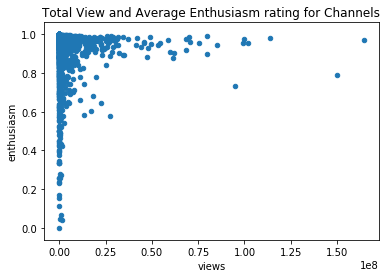

In [185]:
# Popularity -> views vs. Enthusiasm 
f = {'views': ['sum'], 'enthusiasm': ['mean']} 
print(usvideos.groupby(['channel_title']).agg(f))
print(usvideos.groupby(['channel_title']).agg(f).plot(kind="scatter", x='views', y='enthusiasm'))
plt.title("Total View and Average Enthusiasm rating for Channels")
plt.show()

The list shows the highly viewed chnnels registered enthusiasm rating which ranked highly (mostly within range of 85%-100%).However,we cannot concluded that the popularity has signficant affect enthusiasm. From the analysis we have so far, videos have trended on YouTube due to either high enthusiasm (popularity) or high controversy(like Logan Paul example), of these two factors enthusiasm is far more likely to determine a video's ability to trend in the YouTube. 

In [210]:
#Top videos by view per cateogires 
tv = usvideos_average.sort_values('views', ascending=False).reset_index(drop=True)
tv = tv.groupby('category_id').head(1).reset_index(drop=True)
tv[['category_id','title','channel_title','views']].sort_values('category_id', ascending=True).reset_index(drop=True)

,category_id,title,channel_title,views
0,1,Incredibles 2 Official Teaser Trailer,Disney•Pixar,36152111
1,2,Official Ram Trucks Super Bowl Commercial | Ic...,Ram Trucks,25244097
2,10,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,102012605
3,15,BITTEN by a GIANT DESERT CENTIPEDE!,Brave Wilderness,6187457
4,17,Real Life Trick Shots 2 | Dude Perfect,Dude Perfect,29090799
5,19,Turkish Airlines - 5 Senses with Dr. Oz,Turkish Airlines,23932421
6,20,First Look at Nintendo Labo,Nintendo,10256746
7,22,To Our Daughter,Kylie Jenner,56111957
8,23,Anitta & J Balvin - Downtown (Official Lyric V...,Lele Pons,17758014
9,24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,149376127


In [211]:
#Top liked videos by view per cateogires 
tv = usvideos_average.sort_values('likes', ascending=False).reset_index(drop=True)
tv = tv.groupby('category_id').head(1).reset_index(drop=True)
tv[['category_id','title','channel_title','likes']].sort_values('category_id', ascending=True).reset_index(drop=True)

,category_id,title,channel_title,likes
0,1,Incredibles 2 Official Teaser Trailer,Disney•Pixar,444698
1,2,DELIT DE FUITE - le Justicier de Noël,CHRIS-RS,97030
2,10,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,2729292
3,15,BITTEN by a GIANT DESERT CENTIPEDE!,Brave Wilderness,178243
4,17,"CRISTIANO RONALDO E FRED, O GRANDE ENCONTRO",Desimpedidos,1121217
5,19,Eating BRUNCH at Taiwan 7-ELEVEN,Strictly Dumpling,38187
6,20,First Look at Nintendo Labo,Nintendo,268212
7,22,MOMMY AND DAUGHTER SURPRISE DADDY WITH PREGNAN...,The ACE Family,711348
8,23,Anitta & J Balvin - Downtown (Official Lyric V...,Lele Pons,865679
9,24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,3093544


In [217]:
#Top disliked videos by view per cateogires 
tv = usvideos_average.sort_values('dislikes', ascending=False).reset_index(drop=True)
tv = tv.groupby('category_id').head(1).reset_index(drop=True)
tv[['category_id','title','channel_title','dislikes']].sort_values('category_id', ascending=True).reset_index(drop=True)

,category_id,title,channel_title,dislikes
0,1,I Feel Pretty Trailer #1 | Movieclips Trailers,Movieclips Trailers,38082
1,2,Official Ram Trucks Super Bowl Commercial | Dr...,Ram Trucks,12290
2,10,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,165109
3,15,BITTEN by a GIANT DESERT CENTIPEDE!,Brave Wilderness,3886
4,17,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,176903
5,19,Donald Trump audio-animatronic figure at the n...,wdwmagic,9000
6,20,First Look at Nintendo Labo,Nintendo,34441
7,22,PSA from Chairman of the FCC Ajit Pai,Daily Caller,228426
8,23,Anitta & J Balvin - Downtown (Official Lyric V...,Lele Pons,25934
9,24,So Sorry.,Logan Paul Vlogs,1674420
